In [31]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
df_players = pd.read_csv('final_data.csv')

In [4]:
df_players.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [19]:
df_players.shape

(10746, 18)

In [6]:
### i will drop unnecessary columns
df_players.drop(columns=['player', 'team', 'name', 'position_encoded'], inplace=True)

In [15]:
## checking for duplicated
df_players.duplicated().sum()

8

In [16]:
## drop duplicates
df_players.drop_duplicates(inplace=True)

In [18]:
df_players.shape

(10746, 18)

In [17]:
## checking for missing values
df_players.isnull().sum()

position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
winger                 0
dtype: int64

In [21]:
df_players.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
count,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,1.074600e+04,1.074600e+04,10746.000000
mean,181.238001,26.045564,36.434115,0.125648,0.087042,0.189898,0.004669,0.006831,0.131753,0.044914,2472.628792,118.049507,15.838079,1.962218,3.625638e+06,6.157156e+06,0.307742
std,6.970505,4.777299,26.517799,0.235648,0.143385,0.432518,0.025241,0.081173,0.442486,0.924781,2021.330905,175.242459,23.388320,3.744947,9.098270e+06,1.339382e+07,0.461581
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053836,0.000000,0.000000,0.000000,0.000000,662.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,0.000000
50%,181.240353,26.000000,35.000000,0.046178,0.040942,0.150360,0.000000,0.000000,0.000000,0.000000,2104.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,0.000000
75%,186.000000,29.000000,59.000000,0.172400,0.133226,0.248451,0.000000,0.000000,0.000000,0.000000,3968.750000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,1.000000


In [ ]:
## feature engineering 

In [26]:
# One-Hot Encoding the categorical variables
df_players = pd.get_dummies(df_players, columns=['position'], drop_first=True)


In [27]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_players.drop(columns=['highest_value']))


In [28]:
# Splitting data into train and test sets
X = scaled_features
y = df_players['highest_value']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=72)


In [32]:
# Initialize the KNN model
knn = KNeighborsRegressor(n_neighbors=3)

In [33]:
# train the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [35]:
# make predictions
y_pred = knn.predict(X_test)

In [36]:
## evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [37]:
mse

66996114279069.766

In [38]:
rmse

8185115.410247418

In [40]:
r2 
# i think this is not a bad score but it needs some improvements

0.6510788453978957

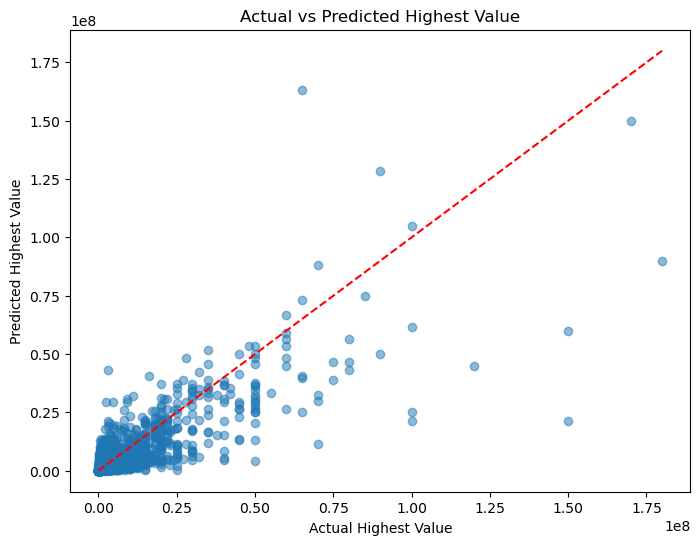

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Highest Value')
plt.ylabel('Predicted Highest Value')
plt.title('Actual vs Predicted Highest Value')
plt.show()
line
# it looks that there are mini points that are wide from the red line
# and many points are close to the red line and clustering around it which i think indicate that the prediction might be good